# Run SATURN to integrate the AH atlas

## Make the run csv file

In [4]:
# Make the csv
import pandas as pd

df = pd.DataFrame(columns=["path", "species", "embedding_path"])
df["species"] = ["human", "mouse", "pig", "macaF", "macaM"]
df["path"] = ["Vignettes/ah_atlas/data/human.h5ad", "Vignettes/ah_atlas/data/mouse.h5ad", 
              "Vignettes/ah_atlas/data/pig.h5ad", "Vignettes/ah_atlas/data/macaF.h5ad", "Vignettes/ah_atlas/data/macaM.h5ad"]

##### CHANGE THESE PATHS #####
human_embedding_path = "/dfs/project/cross-species/yanay/data/proteome/embeddings/Homo_sapiens.GRCh38.gene_symbol_to_embedding_ESM2.pt"
mouse_embedding_path = "/dfs/project/cross-species/yanay/data/proteome/embeddings/Mus_musculus.GRCm39.gene_symbol_to_embedding_ESM2.pt"
pig_path = "/dfs/project/cross-species/yanay/data/proteome/embeddings/Sus_scrofa.Sscrofa11.1.gene_symbol_to_embedding_ESM2.pt"
macaF_path = "/dfs/project/cross-species/yanay/data/proteome/embeddings/Macaca_fascicularis.Macaca_fascicularis_6.0.gene_symbol_to_embedding_ESM2.pt"
macaM_path = "/dfs/project/cross-species/yanay/data/proteome/embeddings/Macaca_mulatta.Mmul_10.gene_symbol_to_embedding_ESM2.pt"
##############################
df["embedding_path"] = [human_embedding_path, mouse_embedding_path, pig_path, macaF_path, macaM_path]
df.to_csv("data/ah_atlas_run.csv", index=False)
df

,path,species,embedding_path
0,Vignettes/ah_atlas/data/human.h5ad,human,/dfs/project/cross-species/yanay/data/proteome...
1,Vignettes/ah_atlas/data/mouse.h5ad,mouse,/dfs/project/cross-species/yanay/data/proteome...
2,Vignettes/ah_atlas/data/pig.h5ad,pig,/dfs/project/cross-species/yanay/data/proteome...
3,Vignettes/ah_atlas/data/macaF.h5ad,macaF,/dfs/project/cross-species/yanay/data/proteome...
4,Vignettes/ah_atlas/data/macaM.h5ad,macaM,/dfs/project/cross-species/yanay/data/proteome...


In [5]:
!cd ../../ ; python3 saturn_multiple_seeds.py \
                --run=Vignettes/ah_atlas/data/ah_atlas_run.csv \
                --gpus 1 3 4 \
                --seeds=1 # change to number of seeds you want to run

['1', '3', '4']
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 507.66it/s]
Global seed set to 0
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Epoch 200: L1 Loss 0.0 Rank Loss 38.453182220458984, Avg Loss human: 2068, Avg L
100%|███████████████████████████████████████████| 49/49 [00:02<00:00, 19.07it/s]


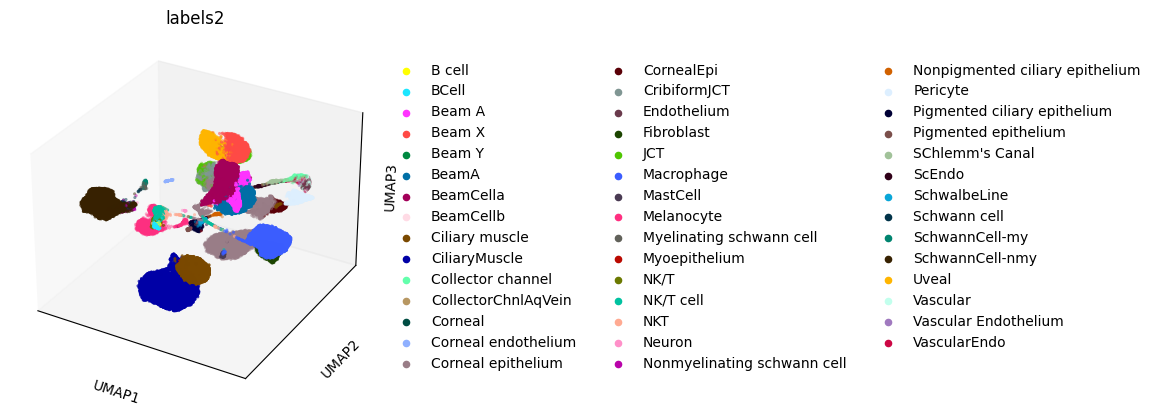

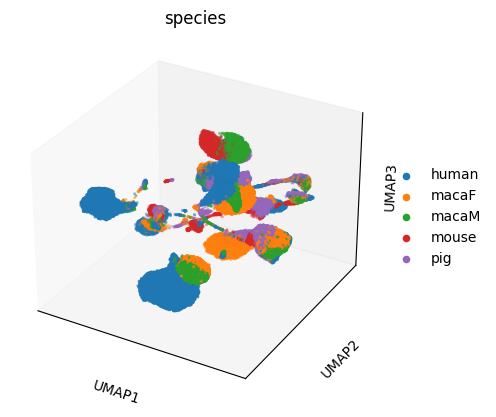

In [1]:
import scanpy as sc
ah_atlas_ad = sc.read("../multiple_seeds_results/saturn_results/test256_data_human_macaF_macaM_mouse_pig_org_ah_atlas_run_l1_0_pe_1.0_None_seed_0.h5ad")
sc.pp.pca(ah_atlas_ad)
sc.pp.neighbors(ah_atlas_ad)
sc.tl.umap(ah_atlas_ad, n_components=3)
sc.pl.umap(ah_atlas_ad, color="labels2", projection="3d")
sc.pl.umap(ah_atlas_ad, color="species", projection="3d")